# Multiclass classification
---------------------------------

Import the wine dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset).
 This is a small and easy to train dataset which goal is to classify wines
 into three groups (which cultivator it's from) using features based on the results
 of chemical analysis.

### Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from atom.atom import ATOMClassifier

# Load the dataset's features and targets
dataset = load_wine()

# Convert to pd.DtaFrame to get the names of the features
data = np.c_[dataset.data, dataset.target]
columns = np.append(dataset.feature_names, ["target"])
data = pd.DataFrame(data, columns=columns)
X = data.drop('target', axis=1)
y = data['target']

### Run the pipeline

In [2]:
# Call ATOMclass for ML task exploration
atom = ATOMClassifier(X, y, n_jobs=-1, verbose=3)

# Fit the pipeline with the selected models
atom.pipeline(models=['LDA','RF', 'lSVM'],
              metric='f1_macro',
              max_iter=4,
              init_points=3,
              cv=3,
              bagging=10)

<<=============== ATOM ===============>>
Parallel processing with 4 cores.
Initial data cleaning...
Algorithm task: multiclass classification. Number of classes: 3.

Dataset stats ===================>
Shape: (178, 14)
Scaled: False
----------------------------------
Size of training set: 124
Size of test set: 54
----------------------------------
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |       59 |           42 |          17 |
|  1 |       71 |           47 |          24 |
|  2 |       48 |           35 |          13 |


Running pipeline =================>
Models in pipeline: LDA, RF, lSVM
Metric: f1_macro


Running BO for Linear Discriminant Analysis...
Initial point: 1 --------------------------------
Parameters --> {'solver': 'lsqr', 'shrinkage': 0.9}
Evaluation --> f1_macro: 0.6787
Time elapsed: 0.815s   Total time: 0.816s
Initial point: 2 --------------------------------
Parameters --> {'solv

### Analyze the results

In [3]:
atom.scores

,model,total_time,score_train,score_test,fit_time,bagging_mean,bagging_std,bagging_time
0,LDA,2.050s,1.0,0.961698,0.079s,0.978848,0.015898,0.035s
1,RF,12.806s,1.0,0.944813,5.671s,0.923975,0.027393,2.345s
2,lSVM,1.379s,1.0,0.961698,0.047s,0.949818,0.011717,0.101s


In [4]:
# Show the results for a different metric
atom.results('precision_macro')


Final results ================>>
Metric: precision_macro
--------------------------------
Linear Discriminant Analysis --> 0.956 !!
Random Forest                --> 0.941
Linear SVM                   --> 0.956 !!


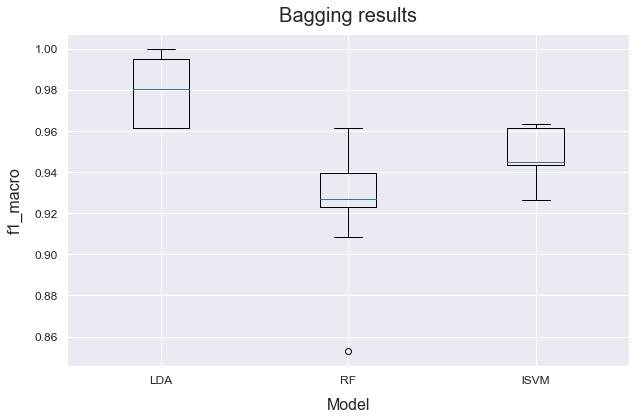

In [5]:
atom.plot_bagging()

### Let's have a closer look at the Random Forest

In [6]:
# Get the results on some other metrics
print('Jaccard score:', atom.rf.jaccard_weighted)
print('Recall score:', atom.rf.recall_macro)

Jaccard score: 0.8960493827160495
Recall score: 0.9526143790849674


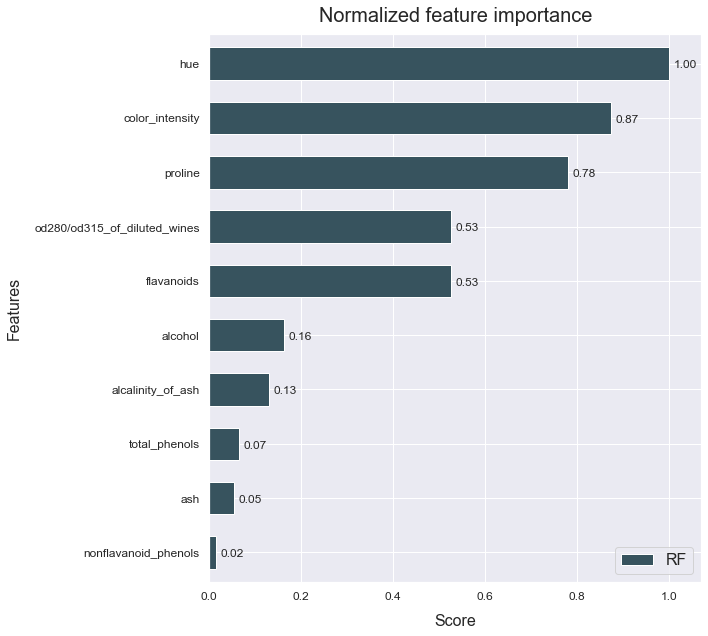

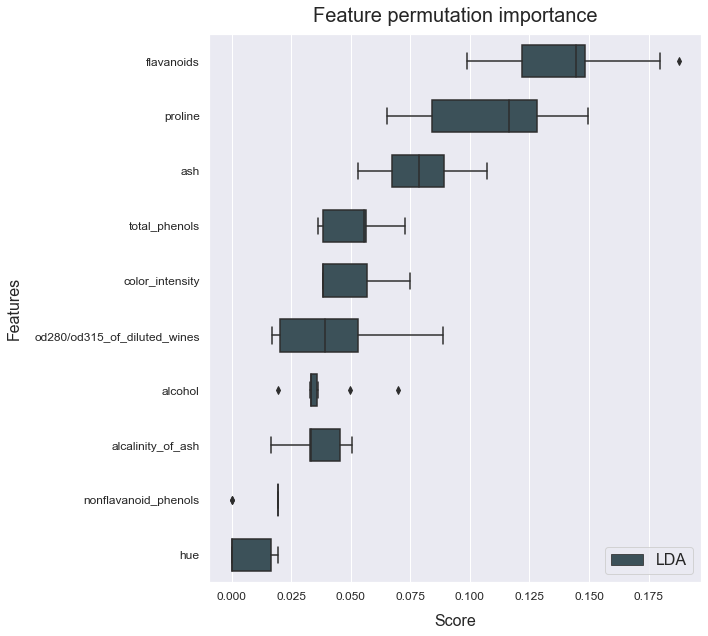

In [7]:
# Plot the feature importance and compare it to the permutation importance of the LDA
atom.rf.plot_feature_importance(show=10)
atom.lda.plot_permutation_importance(show=10)

In [8]:
# Save the random forest class for production
atom.RF.save('Random_Forest_class')

Random Forest model subclass saved successfully!
